# Tutorial: your first simulation

In this tutorial, we will go through the entire research process of designing and building a simulation
of a global health intervention.

## (Fictional) Scenario

We typically work with a "client" -- a stakeholder interested in the results of a potential simulation.

Let's pretend we are working with an organization that is considering funding the distribution of
[Small-Quantity Lipid-Based Nutrient Supplements (SQ-LNS)](https://sqlns.ucdavis.edu/) in Ethiopia,
which are food
supplements designed to prevent malnutrition in children 6-24 months old.
How might we start?


## Design

### Defining the research question

Our research question depends entirely on the context.
We want to answer a question that is relevant to
the stakeholders and decision-makers we are advising,
so we determine the question through dialogue with them.
Often, this starts from a proposal on their side.
The client may come to us with a question like this:

> What would the impact be of scaling up SQ-LNS in Ethiopia?

However, this question is **not** precise enough to be our research question.
We need to ask clarifying questions to understand what options decision-makers
really have and how a simulation result could help them choose.
For example, in a perfect world we might want 100% of children to receive SQ-LNS,
but maybe this isn't a feasible option due to funding constraints
and practical challenges in distribution.

We might ask:

- How much SQ-LNS scale-up could be funded?
- How long would the scale-up take?
- Would it be targeted to a specific population or given to everyone?
- What do we mean by "impact"? What units would this be measured in?
- Are we interested in the impact over 5 years? 10 years? The entire lifetimes of the kids who get the intervention?

Of course, in this tutorial the scenario is invented and we don't have a client
to ask these questions.
However, imagine that we did, and after conversations with them we land on the following research question:

> How much disease burden (measured in [disability-adjusted life years](https://en.wikipedia.org/wiki/Disability-adjusted_life_year) \[DALYs\])
> between the start of 2025 and the start of 2030 would be averted by
> delivering SQ-LNS to all eligible children in Ethiopia starting in 2025?

### Making a causal diagram

Answering this question seems quite difficult --
after all, there are no data from our years of interest (since they are in the future),
and in order to isolate the **effect** of the scale-up, we'd want to
compare a universe where SQ-LNS was delivered with one where it wasn't.

The only way to get out of this conundrum is to apply an understanding of **how** our intervention
could have an impact.
What is the **mechanism**?

A [causal diagram](../../model_design/general_reference_material/causal_diagrams/index.rst) is a convenient
graphical tool for expressing our knowledge about what causes what.
In these diagrams, we draw boxes for each factor of interest and arrows to indicate that one *causally* impacts the other.
We only asked the research question in the first place because we think that
our intervention (SQ-LNS) has a causal effect on the outcome (disease burden):

In order to simulate the effect of SQ-LNS without actually running a randomized controlled
trial (RCT) in Ethiopia, we need to add more detail to this diagram.
What are the intermediate factors on the pathway from SQ-LNS to burden?
We can get a good start in the [SQ-LNS FAQs](https://sqlns.ucdavis.edu/FAQs):

> **What are the benefits of using SQ-LNS?**
>
> A recent individual participant data (IPD) meta-analysis of 14 randomized controlled trials of SQ-LNS provided to children 6-24 months of age (n > 37,000 children) in low- and middle-income countries indicated beneficial effects of SQ-LNS on the prevention of stunting, wasting, developmental delay, anemia and micronutrient deficiencies (Dewey et al. 2021).  These benefits were relatively consistent across study contexts (region, stunting prevalence, anemia prevalence and malaria burden) and study design (duration of supplementation, delivery platform, etc.). Children who received SQ-LNS had a:
> * 12-14% lower prevalence of stunting, wasting and underweight (Dewey et al. 2021).
> * 31% lower prevalence of severe wasting and 17% lower prevalence of severe stunting (Dewey et al. 2022).
> * 16% lower prevalence of anemia, 56% lower prevalence of iron deficiency, and 64% lower prevalence of iron-deficiency anemia (Wessells et al. 2021).
> * 16-19% lower likelihood of scoring in the lowest decile for language, socio-emotional, and motor development (Prado et al. 2021).
>
> Evidence from a meta-analysis also suggests that lipid-based nutrient supplements (SQ- and MQ-LNS trials combined) can reduce child mortality by ~27% between 6 and 24 months of age (Stewart et al. 2020).
> The 14 randomized controlled trials included in the IPD meta-analysis of SQ-LNS were conducted in 9 different countries in Asia, sub-Saharan Africa and Latin American and the Caribbean, and were completed between 2007 and 2019. None of these 14 trials was funded by industry (Dewey et al. 2021), and only one of them received “in-kind” support in the form of donated SQ-LNS from a company.

Of course, the FAQ barely scratches the surface. To do our due diligence, we'd likely want to read the referenced papers, and perhaps even do a literature
review of our own.
One thing to keep an eye out for is any evidence about **negative** effects of our intervention --
in practice there are usually some side effects or risks to balance against the benefits.
However, for the sake of this tutorial, we'll just use the information from the FAQ.

Let's update our causal diagram.
Child mortality is clearly one important type of disease burden, though not the only type
(children might suffer ill health without dying).
Though it's not explicitly stated, we can assume all the health issues mentioned in the FAQ
cause some form of disease burden, but we're not sure which can cause death.
The mechanism by which SQ-LNS reduces child mortality is not totally clear from this information --
it could be purely a result of the other benefits listed, or there might be some additional, separate benefit.

We'll also weave in our understanding that "iron-deficiency anemia" means anemia *caused by* iron deficiency.

Now it is time to bring the [**Global Burden of Disease Study (GBD)**](https://www.healthdata.org/research-analysis/gbd) into the picture.
In almost every global health model we make, GBD is the cornerstone data source.
It provides us with estimates about a wide array of health outcomes and risk factors in
a standard format, which allows us to much more quickly build simulations using these data.
GBD estimates are the result of a very complex process; in this tutorial,
we won't dive any deeper into GBD methods than we absolutely need to,
but we will provide guidance on where you can learn more.

Some foundational GBD terminology: **burden** (measured in disability-adjusted life years \[DALYs\])
is composed of **fatal burden** (burden due to premature death, measured in years of life lost \[YLLs\])
and **nonfatal burden** (burden due to disability, measured in years lived with disability \[YLDs\]).
In fact, DALYs equal the sum of YLLs and YLDs.

All burden has a **cause** -- this general word means something very specific in GBD!
A GBD cause is a _disease_ or _injury_, such as lung cancer or road injuries, that causes burden (hence the name).

A **risk** or **risk factor** is (very roughly) something that is not itself a disease or injury
but makes disease or injury more likely, such as air pollution.
However, this is often kind of a fuzzy distinction/judgement call:
for example, does having high blood pressure count as a disease or just something that can
lead to one?
(GBD's answer: the latter. High systolic blood pressure is considered a risk factor.
It can lead to diseases such as hypertensive heart disease.)


GBD has its own (implied) causal diagram, which isn't always the same as what we have in
our heads or get from other data sources.
We'll want to check how GBD models things early in the process -- divergence from GBD
can make our job much harder!

The basic structure of a GBD causal diagram is as follows.
Risks affect causes, which may affect fatal and/or nonfatal burden,
which sum to total burden.
Sometimes, risks can affect other risks, which is a concept known in
epidemiology as "mediation."

In many cases, that is all we need to look at in GBD.
However, GBD nonfatal burden is actually categorized [in a more complicated way](../../model_design/vivarium_model_components/GBD_disease_health/index.rst)
that introduces another layer: _sequelae_,
which are detailed types of impact a cause can have on a person's health.
For example, "mild heart failure due to hypertensive heart disease" is a sequela caused by "hypertensive heart disease."
Sometimes, we need to think about these, especially when something we model corresponds to a GBD _impairment_,
which is a collection of sequelae across one or more causes.

Lastly, there are always exceptions and places where the GBD causal diagram doesn't work this way. This can take some work to figure out, and usually starts with digging into the GBD methods -- we'll show you how to do this below!

The first step in designing our simulation is to find the GBD entities appropriate for modeling that are most relevant to our working causal diagram for SQ-LNS.

<div class="alert alert-info">

Note

What do we mean by "appropriate for modeling"?

This is a complex topic, but for now what you need to know is:

* GBD causes and risks are both hierarchical.
  There are higher-level causes such as sexually transmitted infection that are made up of more detailed lower-level causes such as syphilis.
  Likewise, there are higher-level risks such as "metabolic risks" that are made up of more detailed risks such as high blood pressure.
* We typically only model most-detailed causes and risks.
  GBD doesn't estimate all the quantities we need for modeling about higher-level entities.
  With extra work, it may be possible for us to derive these quantities from GBD results, but that is not common practice on our team and is
  outside the scope of this tutorial. 
  This is an area our team is interested in exploring more in the future.

</div>

There are several ways to find these entities.

* If you open [the GBD results tool](https://vizhub.healthdata.org/gbd-results/),
  the sidebar on the left allows you to search and select causes, risks, and impairments.
* If you open [GBD Compare](https://vizhub.healthdata.org/gbd-compare/#) to the map or plot view,
  the sidebar on the left allows you to search and select causes and risks (and impairments, if you
  click "use advanced settings").
* Internally to IHME, there is the [Shared Hierarchy Editor](https://she.ihme.washington.edu/explore/cause/version/655)
  -- don't worry, you won't edit anything by accident.
* Entities can be accessed programmatically with the `gbd_mapping` package, which is part of our Vivarium microsimulation suite.
  Internally to IHME, [shared functions](https://hub.ihme.washington.edu/spaces/SF/pages/140542419/Shared+Functions+Home) can also be used.

Here, we'll use `gbd_mapping`.

In [1]:
import gbd_mapping

In [2]:
# This function searches all the most-detailed risk factors
# (i.e. those generally appropriate for modeling)
# for those that contain a search term.
def most_detailed_risk_factors_containing(term: str) -> list[str]:
    return [
        r.name for r in gbd_mapping.risk_factors if term in r.name and r.most_detailed
    ]

In [3]:
most_detailed_risk_factors_containing("stunting")

['child_stunting']

In [4]:
most_detailed_risk_factors_containing("wasting")

['child_wasting']

In [5]:
most_detailed_risk_factors_containing("underweight")

['child_underweight']

In [6]:
most_detailed_risk_factors_containing("iron")

['iron_deficiency']

In [7]:
most_detailed_risk_factors_containing("anem")

[]

In [8]:
most_detailed_risk_factors_containing("cogn")

[]

We see that child stunting, wasting, and underweight are all risk factors, as is iron deficiency. However, we don't see anything for anemia or cognition yet.

In [9]:
# Analogous function for GBD causes
def most_detailed_causes_containing(term: str) -> list[str]:
    return [c.name for c in gbd_mapping.causes if term in c.name and c.most_detailed]

In [10]:
most_detailed_causes_containing("anem")

['other_hemoglobinopathies_and_hemolytic_anemias']

In [11]:
most_detailed_causes_containing("iron")

['dietary_iron_deficiency', 'environmental_heat_and_cold_exposure']

In [12]:
most_detailed_causes_containing("cogn")

[]

In [13]:
most_detailed_causes_containing("intell")

['idiopathic_developmental_intellectual_disability']

Based on a Google search, we learn that "hemoglobinopathies" and "hemolytic anemias"
are types of anemia *not* caused by iron deficiency. And idiopathic developmental intellectual disability looks to be a very
specific and severe issue with cognitive development, whereas the reported impact of SQ-LNS was on being in the lowest decile.
So neither of these are too useful for modeling SQ-LNS.
"Dietary iron deficiency" does sound interesting, though you might wonder how it differs from the "iron deficiency" risk factor.
More on that in a moment.

Let's look at what causes are affected by the risk factors we found.

In [14]:
def most_detailed_affected_causes(risk: gbd_mapping.RiskFactor) -> list[str]:
    return [c.name for c in risk.affected_causes if c.most_detailed]

In [15]:
most_detailed_affected_causes(gbd_mapping.risk_factors.child_stunting)

['diarrheal_diseases', 'lower_respiratory_infections', 'measles', 'malaria']

In [16]:
most_detailed_affected_causes(gbd_mapping.risk_factors.child_wasting)

['diarrheal_diseases',
 'lower_respiratory_infections',
 'measles',
 'malaria',
 'protein_energy_malnutrition']

In [17]:
most_detailed_affected_causes(gbd_mapping.risk_factors.child_underweight)

['diarrheal_diseases',
 'lower_respiratory_infections',
 'measles',
 'malaria',
 'protein_energy_malnutrition']

In [18]:
# Interesting that child stunting, wasting, and underweight are all associated with some of
# the same causes!
# Are they part of a GBD parent risk factor?
gbd_mapping.risk_factors.child_stunting.parent.name

'child_growth_failure'

In [19]:
# That contains all three!
[c.name for c in gbd_mapping.risk_factors.child_growth_failure.sub_risk_factors]

['child_underweight', 'child_wasting', 'child_stunting']

In [20]:
most_detailed_affected_causes(gbd_mapping.risk_factors.iron_deficiency)

['maternal_hemorrhage',
 'maternal_sepsis_and_other_maternal_infections',
 'maternal_hypertensive_disorders',
 'maternal_obstructed_labor_and_uterine_rupture',
 'ectopic_pregnancy',
 'indirect_maternal_deaths',
 'late_maternal_deaths',
 'other_direct_maternal_disorders',
 'dietary_iron_deficiency',
 'maternal_deaths_aggravated_by_hiv_aids',
 'maternal_abortion_and_miscarriage']

In [21]:
# Hmm, a lot of maternal stuff in that list.
# Let's see if we can find a parent cause.
gbd_mapping.causes.maternal_hemorrhage.parent.name

'maternal_disorders'

In [22]:
# Which ones does that contain?
maternal_disorders_sub_causes = [
    c.name for c in gbd_mapping.causes.maternal_disorders.sub_causes
]
maternal_disorders_sub_causes

['maternal_hemorrhage',
 'maternal_sepsis_and_other_maternal_infections',
 'maternal_hypertensive_disorders',
 'maternal_obstructed_labor_and_uterine_rupture',
 'ectopic_pregnancy',
 'indirect_maternal_deaths',
 'late_maternal_deaths',
 'other_direct_maternal_disorders',
 'maternal_deaths_aggravated_by_hiv_aids',
 'maternal_abortion_and_miscarriage']

In [23]:
# Ok, almost all of them. What does that leave us with?
[
    c
    for c in most_detailed_affected_causes(gbd_mapping.risk_factors.iron_deficiency)
    if c not in maternal_disorders_sub_causes
]

['dietary_iron_deficiency']

Now, we use this information to flesh out a GBD causal diagram of relevant entities. We can use the parent risks/causes we found to simplify the diagram, but keep in mind that we will ultimately need to figure out how to model every most-detailed risk and cause!

Now seems like a good time to dive a bit deeper into what is happening with iron deficiency and anemia,
and in the process learn how to dig into the GBD methods.

Remember, in our original causal diagram (from the FAQ) we had "iron deficiency" and "anemia."
In GBD, however, we've found only an "iron deficiency" risk factor and a "dietary iron deficiency" cause.
How do these things correspond?

The best explanations of GBD methods are the "methods appendices," which are appendices published along with
the GBD capstone papers in the Lancet's GBD issue.
The first step is identifying the correct capstone paper; it needs to be from the GBD cycle we are using
in our model.
For this model, we're using GBD 2021, so the Lancet issue of interest is [this one](https://www.thelancet.com/journals/lancet/issue/vol403no10440/PIIS0140-6736(24)X0020-3)
and the capstone papers are:

* [Demographics](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(24)00476-8/fulltext)
* [Fertility](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(24)00550-6/fulltext)
* [Fatal/Cause of death](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(24)00367-2/fulltext)
* [Nonfatal/Disability](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(24)00757-8/fulltext)
* [Risk factors](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(24)00933-4/fulltext)
* [Forecasting](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(24)00685-8/fulltext)

We're interested in a risk factor and a *nonfatal* cause here, so either the risk factor capstone
or nonfatal capstone would be good guesses of where to start.

Page 309 of the risk factor methods appendix is about the iron deficiency risk factor. Some key quotes:

> **Exposure is quantified in terms of mean haemoglobin concentration...**

> [The "iron deficiency" risk factor] is distinct from the GBD cause of “dietary iron deficiency” that only includes the subset
> of anaemia that is due to inadequate intake of elemental iron and excludes other diseases that manifest as iron
> deficiency...

> Iron deficiency was quantified as an output of the GBD Anaemia Causal Attribution framework...
> See the methodological description of “Anaemia (impairment)” for detailed description of
> the analytic approach and inputs.

It sounds like the GBD "iron deficiency" risk factor is closely related to the concept of anemia.
Its exposure is quantified in terms of hemoglobin.
Some background research turns up (for example) [this page](https://www.hematology.org/education/patients/anemia)
from the American Society of Hematology which states that anemia is defined by hemoglobin:

> [Anemia] is diagnosed when a blood test shows a hemoglobin value of less than 13.5 gm/dl
> in a man or less than 12.0 gm/dl in a woman. Normal values for children vary with age.

However, there's additional complexity to the iron deficiency risk factor, which is explored in subsequent pages
of the risk factor methods appendix.
For the purposes of drawing this causal diagram, we can assume the iron deficiency risk factor is the same
as "anemia" from the SQ-LNS FAQ, but we'd need to understand some of these additional intricacies before actually modeling it.

Given what we've learned so far, you might wonder: what was meant by "iron deficiency" in the SQ-LNS FAQ, if that was distinct
from anemia?
To find this out, we'll scan [the paper cited in the FAQ](https://pmc.ncbi.nlm.nih.gov/articles/PMC8560313/),
which is available for free on PubMed Central.
There, iron deficiency was defined using "plasma ferritin," which we can confirm is _not_
the same thing as hemoglobin and doesn't appear anywhere in the risk factors methods appendix.

So, to summarize: GBD "iron deficiency" risk is approximately the same thing as SQ-LNS FAQ "anemia."
Good thing we checked!

<!-- https://nbsphinx.readthedocs.io/en/latest/markdown-cells.html#Info/Warning-Boxes -->

<div class="alert alert-info">

Note

As you may have guessed from the mention of an impairment in the risk factor appendix description,
if we really wanted to dig into this we would follow that lead and discover that GBD has an even
more non-standard causal diagram of anemia. We won't get into that here.

</div>

Now let's merge our GBD causal diagram into our working SQ-LNS causal diagram.
In doing this, we have some opportunities to simplify: because SQ-LNS is
only given to children, maternal disorders are not relevant.
We don't need to remove things just because they aren't in GBD
(for example, cognitive development), but we should keep in mind that
these will require a lot more data seeking!

Don't be afraid of making a very complex diagram at this stage!
This is the time to go maximalist before we start editing down to what we will actually model.

As an example, based on having read studies like [Wessells et al. 2021](https://pubmed.ncbi.nlm.nih.gov/34590114/),
we think it is quite likely that SQ-LNS is less effective in areas with unsafe sanitation infrastructure (a risk factor available in GBD):

In [24]:
most_detailed_risk_factors_containing("sanitation")

['unsafe_sanitation']

In [25]:
most_detailed_affected_causes(gbd_mapping.risk_factors.unsafe_sanitation)

['diarrheal_diseases']

Unsafe sanitation, child growth failure, and iron deficiency are likely all driven by some social determinants
of health, such as poverty (not modeled by GBD).

### Deciding what to model

<!-- **TODO:** Choose which parts of the causal diagram are worth the data seeking + modeling effort,
due to their importance in the intervention-outcome pathway. Somehow in this section we will decide to whittle it down to only SQ-LNS -> Stunting -> LRI.
Perhaps by looking at GBD attributable burden and doing a quick back-of-the-envelope. -->

It is probably clear from the previous section that it is easy to end up with an enormously complicated causal diagram.
Modeling risks, causes, etc is a time-intensive process, and we usually can't model everything.
The process of editing down from a full causal diagram to a "minimum viable model" includes many considerations
and is discussed at length [on our Minimum Viable Model page](../../model_design/designing_vivarium_model/minimum_viable_model/index.rst).
For the purposes of this tutorial, we will make our model *very* minimal.
We'll focus on one important "pathway" between our intervention and our outcome.

How do we know which pathways are more important than others?
We can typically make some good guesses in a very simple way, which we often call a "back of the
envelope" calculation.
Since this is a tutorial, we'll make it even simpler than it typically is.

As a first pass, we can look at which GBD causes in our diagram have the most burden in Ethiopian
children <5 years old. The GBD results tool is useful for this, and shows us the following on the Charts tab (click
the image to open the results tool query):

[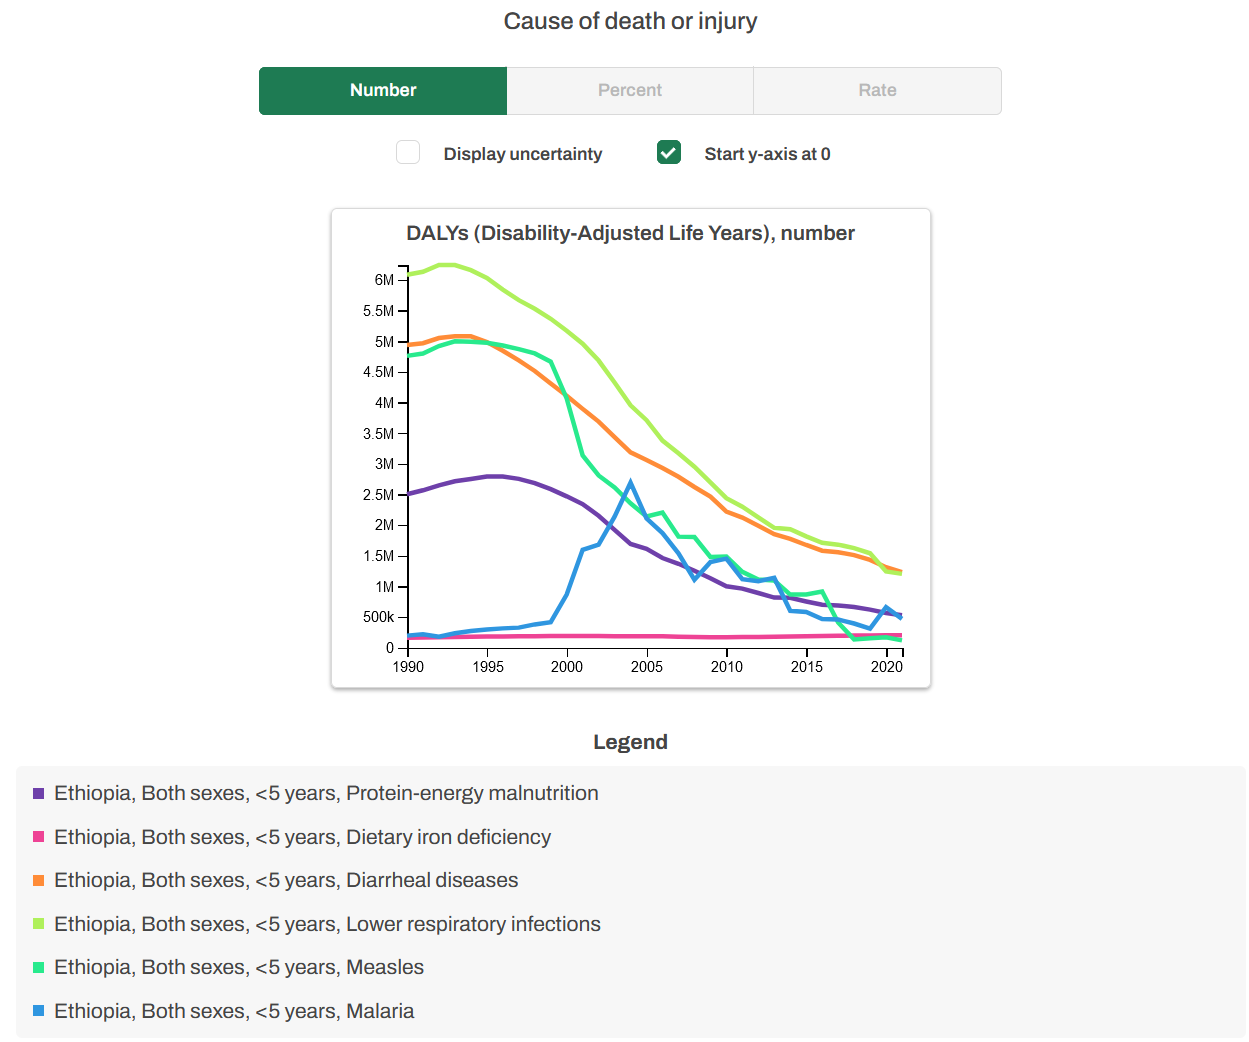](https://vizhub.healthdata.org/gbd-results?params=gbd-api-2021-permalink/7a32e4d938aad2c598e7f22bb298b9af)

We see that lower respiratory infections and diarrheal diseases have the largest burden.
It is also important to think about the pathway from our intervention;
SQ-LNS only impacts these causes in our diagram through the child growth failure
risks.
By changing the "GBD estimate" dropdown to "Risk factor" we can make a table and
graph of the burden of each cause *attributable to each of the child growth failure risks*:

[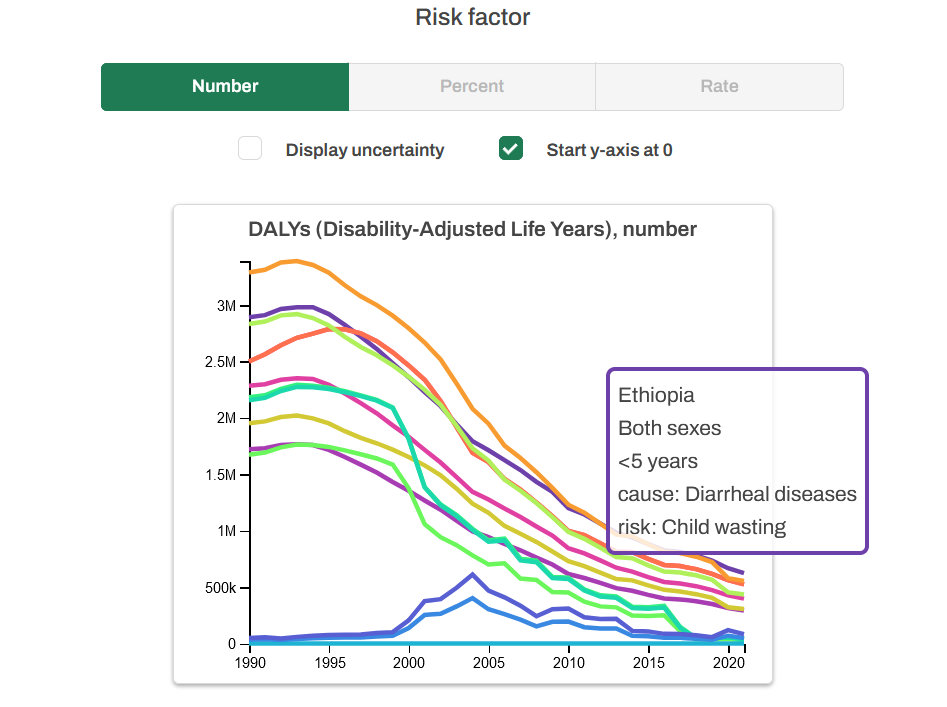](https://vizhub.healthdata.org/gbd-results?params=gbd-api-2021-permalink/b47c6b744bebd9e6c03c883649459d61)

There are a lot of lines on this plot, so we've moused over the top one to reveal that it is
diarrheal diseases burden attributable to child wasting.

We'll decide to model this pathway, and cut out everything else,
which leaves us with this stripped-down causal diagram of what we will model:

### Data strategy

It's generally a good next step to find the data we can use to inform our model.
If there are serious data gaps that force us to substantially redesign our model,
it is much better to find out now than after we've spent time designing and building it!

#### GBD

Generally, for model components that exist in GBD, our data strategy is relatively standard.

Implicit to our diagram is a population -- e.g. how many children ages 6-24 months are
there in Ethiopia?
We nearly always get a population structure by age group and sex from GBD.
When we need to model fertility (new simulants being born), we can also pull either the count of
births per year, or the rates at which females in each age group give birth (also known as the
"age-specific fertility rate" or ASFR for short).

For a cause, such as diarrheal diseases, the Vivarium suite can pull GBD results about:

* Prevalence: proportion of people who have the disease
* Incidence rate: the rate at which people acquire the disease
* Mortality rate: the rate at which people die of the disease

*Sometimes*, GBD will also save results about **remission**, which is the rate at which people with the disease get better and stop having the disease.
However, this is not uniformly available for all most-detailed causes.
Frequently, when this isn't saved, we can find information about duration of the condition in the nonfatal methods appendix.
For diarrheal diseases, it *is* saved, so we don't have to look for this.

<div class="alert alert-info">

Note

Sometimes, we *prefer* to use a duration from the methods appendix (or another source) over the GBD remission estimate,
so even if it exists, we don't *always* use it.
For the purposes of this tutorial, we will use the GBD remission estimate, since that makes our process a bit simpler.

</div>

One thing to be careful of is COVID effects. Since we want to simulate 2025-2030, we may be more
comfortable assuming that infectious disease burden is like 2019 (pre-pandemic) than 2021 (during pandemic).
Because diarrheal disease is mostly spread through contaminated water, and
[doesn't exhibit a strong COVID "shock" (a sudden change coinciding with the pandemic) in GBD](http://ihmeuw.org/6syo), we will use 2021.

For a risk factor, such as child wasting, our standard tools pull GBD results about **exposure**
(what proportion of the population is exposed to what levels of the risk factor)
and **relative risks** on modeled causes (how much exposure to the risk factor increases the
risk of having, or dying from, the disease).

Risk factors are a little bit less standardized than causes, so it is always good to investigate
how the exposure was quantified. Some risk factors are continuous (e.g. systolic blood pressure
is a number with units of mm Hg) and some are categorical
(e.g. unsafe sanitation is either "Unimproved sanitation," "Improved sanitation," or "Sanitation facilities with sewer connection or septic tank").
To find out, we'll refer to the risk factors methods appendix, where we find that child wasting was modeled as part of a
combined model with the two other child growth failure indicators
(this model is described on pages 146-162).
Wasting was operationalized as weight-for-height Z score (WHZ) and was categorized into
mild (-1 to -2 Z score), moderate (-2 to -3 Z score), and severe (<-3 Z score).

#### Non-GBD

The one non-GBD node in our diagram is SQ-LNS, our intervention. Generally, for interventions,
we'll be seeking information about baseline coverage (would anyone receive this intervention if our client took no action?)
and the size of any effects (in this case, the one on child wasting).

Baseline coverage can be difficult to estimate; often, there isn't great data.
We know that SQ-LNS is a newer intervention, and the SQ-LNS website mostly advocates for its adoption
and reports on trials using it, rather than large-scale programs.
We might take the baseline coverage question to our client to get their subject-matter expertise.
Let's pretend that we've done that, and they've said that their best guess is that there won't be
any SQ-LNS coverage in Ethiopia unless they fund this program.

We could do a whole literature review to inform the impact of the intervention on child wasting.
But for simplicity here, we'll use the meta-analysis by Dewey et al. that was linked from the SQ-LNS FAQ.
Digging into that paper, Table 3 reports a 14% decrease in wasting with a confidence interval of 7-20%.
Wasting was defined as a weight-for-length Z score (WLZ -- which is equivalent to WHZ) of less than -2.

<div class="alert alert-info">

Note

You may have noticed that the SQ-LNS FAQ also reported a larger reduction -- 31% -- in
the prevalence of *severe* wasting.
If this were a real model, we'd certainly want to include this data point as well.
We're sticking with only the effect on overall wasting to keep the tutorial simple.

</div>

### Microsimulation approach

Now that we have a pretty good idea of what we want to model and what data are available,
we must determine how we want to implement these attributes in microsimulation.

Our microsimulation will contain a big table of pretend people, who we call **simulants**.
We will track certain attributes about each simulant, and as time passes in the simulation,
events can cause these attributes to change.
For example, a simulant may get older and have their "age" attribute updated, or they may
get infected with a diarrheal disease and have their "has diarrhea" attribute updated to "yes."
For a visual explanation, check out the
["What is microsimulation?" section of "What is Vivarium good for?"](../../model_design/vivarium_overview/vivarium_versus_other_model_types/index.rst#what-is-microsimulation).


#### Demographics/population

What population of simulants do we need for this simulation?

On first thought, you might think we only need simulants 6-24 months old,
since that is the age at which they are eligible to receive SQ-LNS.
However, there is some nuance to this: simulants will age during our simulation.
The simulants eligible to receive SQ-LNS in 2029 won't have even been *born*
yet in 2025. For that reason, we'll start with a population of simulants ranging from 24 months old all the way down to newborns,
and we'll need to model fertility to have new births during the simulation.
This is easier, with our current tools, than creating 6-month-old simulants out of thin air
during the simulation.

There are several standard ways we model fertility. In this case, because we won't be
simulating the adults who would be giving birth, using age-specific fertility rates doesn't
make sense. Instead, we'll use a crude birth rate approach, which creates new simulants at
a certain rate without identifying who specifically their parents are.

#### Burden

Burden is typically modeled the same in every simulation we make.
Death/mortality is modeled as a **state machine** where people move ("transition") dynamically
between states depending on their current state.

Here is a diagram of our standard mortality state machine, where a circle
is a state a simulant could be in, and an arrow is a transition a simulant could make from
one state to another:


The transition in this diagram is informed by GBD mortality rates.
Our standard approach is to start from GBD's all-cause mortality rate, which is the rate at which people in the population die (of any cause).
Then, we delete cause-specific mortality rates due to modeled causes to determine the "background" mortality rate (mortality rate due to everything we're not modeling explicitly),
which we apply to all simulants.
A "cause-specific mortality rate" is the rate at which people in the overall population die of a specific cause; it is directly comparable with the
all-cause mortality rate because both have the full population as the denominator.
On top of the background mortality, for each modeled disease/cause, we apply the GBD-derived *excess* mortality rate of that disease *only to simulants who currently have the disease*.
The excess mortality rate is the term for the rate of death due to a disease among people who have that disease (which will always be higher than the cause-specific mortality rate, since people without the disease cannot die of it).

Nonfatal burden is estimated by applying GBD disability weights to those in
infected states.


#### Cause

We typically model causes as state machines.
The specifics of the disease in question inform the way we set up the state
machine.

As mentioned in the data strategy section, GBD causes are pretty standard.
They usually give us information about two states: having the disease, and not having it.
("Having the disease" is often called "infected," even when talking about a non-infectious disease.)
GBD gives us (some) information on how people move between these states.

We may choose to sub-divide either or both of these states in our state machine
model.
For example, for progressive diseases like cancers that go into remission and relapse,
we may want to have a state for "newly diagnosed," "first relapse," etc.
For some diseases, the "not having the disease" state is really a composite of multiple
things: for example, people without a vaccine-preventable disease
may or may not be vaccinated, and only those not vaccinated would be at risk of developing it.

For our example, diarrheal diseases are typically of very short duration, so we definitely want to capture
that people can have go in and out of episodes.
However, unlike some infectious diseases,
having an episode of diarrheal disease does not generally make you immune from future episodes,
and while there are vaccines for some specific pathogens such as rotavirus,
there isn't a population totally immune to diarrhea.
Therefore we'll assume that everyone who doesn't have
diarrheal diseases can be called "susceptible" to them.
This makes diarrheal diseases best represented by this state machine:

This is called a Susceptible-Infected-Susceptible or "SIS" model.

For more information on how we model causes, see [the Causes page](../../model_design/vivarium_model_components/causes/index.rst).

#### Risk factor

Since child wasting in GBD is a categorical risk factor with normal, mild, moderate, and severe
categories, we can plan to assign each of our simulants to one of these categories.

Note that these categories are more detailed than our SQ-LNS effect size, which simply
tells us what proportion of wasted kids (whether moderate or severe) would no longer be wasted
after receiving SQ-LNS. This effect size doesn't differentiate between moderate and severe wasting,
nor does it tell us whether the kids who benefit would become only mildly wasted, or recover
completely to normal.
We have to make an assumption about this; for simplicity, we'll say that this proportion of kids
in each of the moderate and severe categories would be in the mild category if they were receiving SQ-LNS.

<div class="alert alert-info">

Note

As noted above, the SQ-LNS FAQ also reported a larger reduction -- 31% -- in
the prevalence of *severe* wasting.
We haven't accounted for that here.

</div>

We also have to decide whether a simulant's wasting category changes over time.
Intuitively, it makes sense that it would, since kids can gain weight or fail to gain weight at any
point during their growth.
However, GBD does not provide rates of changing from one category to another of categorical risk
factors, so if we decided this was important to capture, we'd have to go back and seek outside data
on this.
For now, we'll keep it simple and say that wasting category does not change (is **static**).

For more information on how we model risk factors, see [the Risk Factors page](../../model_design/vivarium_model_components/risk_factors/index.rst).

#### Intervention

What sort of attribute is SQ-LNS? Looking at our research question and at our effect size
(a 14% decrease in wasting in the covered vs uncovered group),
it appears to be binary -- you either receive SQ-LNS or you don't.

Should SQ-LNS change over time for simulants? This isn't really an impactful question, since
in our baseline scenario nobody will be receiving SQ-LNS and in our intervention scenario
everyone will be. But just in case we want to test an in-between scenario in the future,
we'll specify that who is covered by partial SQ-LNS coverage will not change over time.

Lastly, what is the time period of our effect -- do simulants only benefit while they are
receiving SQ-LNS or does the benefit persist?
Based on the available evidence, we'll assume the benefit is only for the duration of receiving
SQ-LNS, but this may lead to an underestimate of impact if the real benefit lasts longer.

For more information on how we model interventions, see [the Interventions page](../../model_design/vivarium_model_components/interventions/index.rst).

## Implementation

Now that we've designed a model, we can implement it using the Vivarium suite.

There are a few major steps to this process:

* Creating the model structure out of **components**
* Obtaining the **data** we need for our simulation and saving it to a file called the "data artifact," or "artifact" for short
* **Configuring** our model for our desired simulation parameters

### Components

Vivarium is a *modular* simulation framework: a simulation is made out of
**components**.
If we packed everything we wanted to simulate into one component, we could
never re-use it, and would need to start from scratch with each new simulation.
By splitting the simulation up into small components that each do one thing,
we can re-use those components and combine them in new ways without having
to create any new ones!

In fact, we've created a standard library of components called `vivarium_public_health`
(sometimes abbreviated "VPH") that covers many common health simulation scenarios.
Often, most of a simulation can be made with these, and only a few new components
are needed!

For our simulation in this tutorial, we'll use `vivarium_public_health` components
for population, mortality, crude birth-rate fertility, and our cause and risk.

In [26]:
# Import the relevant sections of the component library
import vivarium_public_health.population
import vivarium_public_health.risks
import vivarium_public_health.disease

components = [
    # Demographics
    vivarium_public_health.population.BasePopulation(),
    vivarium_public_health.population.Mortality(),
    vivarium_public_health.population.FertilityCrudeBirthRate(),
    # Cause
    vivarium_public_health.disease.SIS("diarrheal_diseases"),
    # Risk
    vivarium_public_health.risks.Risk("risk_factor.child_wasting"),
    # The effect of the risk on the cause
    vivarium_public_health.risks.effect.RiskEffect(
        "risk_factor.child_wasting",
        "cause.diarrheal_diseases.incidence_rate",
    ),
    # TODO: We currently don't have a good way to model risk effects on
    # mortality, even when those are specified by GBD, with standard
    # components.
    # This is something we'd like to add to the tutorial when
    # vivarium_public_health supports it "out of the box."
    # vivarium_public_health.risks.effect.RiskEffect(
    #     "risk_factor.child_wasting",
    #     "cause.diarrheal_diseases.cause_specific_mortality_rate",
    # ),
]

These components all *do* things: create newborn simulants, make simulants get sick and recover, or make simulants die, for example.
We also typically need a type of component called an **observer**, which does not act on the simulated population but just records what happens.
This is how, for example, we can record the disease burden our simulants experience.
There are standard observers in `vivarium_public_health` -- we'll use some that record the fatal and nonfatal burden.

In [27]:
import vivarium_public_health.results

components += [
    # Observers
    vivarium_public_health.results.DisabilityObserver(),
    vivarium_public_health.results.MortalityObserver(),
]

The last thing that is missing is our intervention. Unfortunately, we can't currently get this from `vivarium_public_health` -- for now, we need to make this
component from scratch.
There is work underway to add a cookie-cutter intervention component to `vivarium_public_health`,
which will make this easier!

A component is a Python *class* with special methods and properties. We won't get into all the details here,
but at a high level:

* We want our intervention to change simulants' exposure to child wasting.
* The `vivarium_public_health.risks.Risk` component we added above will create something called
  a "value pipeline" for the child wasting exposure. This value pipeline will be called
  `child_wasting.exposure`.
* Our intervention component, then, will *modify* the value pipeline.
  We do this by registering a "value modifier" function.
* We want our intervention component to be configurable, so we can change the coverage of SQ-LNS.
  That will allow us to run the simulation once with 0% coverage and once with 100% coverage,
  then compare the results to see the impact of SQ-LNS.

In [28]:
import pandas as pd

import vivarium
from vivarium import Component
from vivarium.framework.engine import Builder


class SQLNS(Component):
    columns_created = ["covered_by_sqlns", "would_benefit_from_sqlns"]

    # This special method, setup, runs once when the simulation is being set up,
    # before any time has passed in the simulation.
    def setup(self, builder: Builder) -> None:
        # Get the desired coverage level from the configuration.
        self.coverage = builder.configuration["sqlns"]["coverage"]
        # Create a random number generator for this component.
        self.randomness = builder.randomness.get_stream("sqlns")
        builder.value.register_value_modifier(
            "child_wasting.exposure",
            modifier=self.intervention_effect,
            requires_columns=[
                "covered_by_sqlns",
                "would_benefit_from_sqlns",
            ],
        )

    def on_initialize_simulants(
        self, pop_data: vivarium.framework.population.SimulantData
    ) -> None:
        # pop_data is information about the simulants being initialized.
        # We use it to create new columns in the population data frame.
        covered_by_sqlns = pd.Series(
            # get_draw draws a random number from the uniform distribution between 0 and 1
            # for each simulant.
            self.randomness.get_draw(
                pop_data.index,
                # NOTE: It is important that we provide additional keys here, as otherwise
                # our two calls to get_draw will return the same results!
                additional_key="covered_by_sqlns",
            )
            <= self.coverage,
            name="covered_by_sqlns",
        )
        would_benefit_from_sqlns = pd.Series(
            # 13% of those who receive SQLNS and are wasted benefit from it,
            # in that they become no longer wasted, so we label 13% of the population as
            # potentially benefiting from it.
            # Of course, only these people who also are wasted and receive SQLNS
            # will actually have the benefit.
            self.randomness.get_draw(
                pop_data.index,
                additional_key="would_benefit_from_sqlns",
            )
            <= 0.13,
            name="would_benefit_from_sqlns",
        )
        self.population_view.update(
            covered_by_sqlns.to_frame().join(would_benefit_from_sqlns)
        )

    def intervention_effect(
        self, index: pd.Index, child_wasting: pd.Series
    ) -> pd.Series:
        # Here, 'index' is the index of the data frame that is being modified.
        # 'child_wasting' is a series containing the child wasting values before modification.

        # First, we map child wasting to more readable categories.
        category_mapping = gbd_mapping.risk_factors.child_wasting.categories.to_dict()
        assert (child_wasting.isin(category_mapping.keys()) | child_wasting.isnull()).all()
        child_wasting = child_wasting.map(category_mapping)

        pop = self.population_view.get(index)

        baseline_wasting_moderate_severe = child_wasting[index].isin(
            [
                "Wasting Between -3 SD and -2 SD (post-ensemble)",
                "Severe Wasting, < -3 SD (post-ensemble)",
            ]
        )
        # Change those who benefit and are moderately or severely wasted to the mild category.
        child_wasting.loc[
            index[
                baseline_wasting_moderate_severe
                & pop.covered_by_sqlns
                & pop.would_benefit_from_sqlns
            ]
        ] = "Wasting Between -2 SD and -1 SD (post-ensemble)"

        # Map back to the original, less readable categories.
        return child_wasting.map({v: k for k, v in category_mapping.items()})

In [29]:
components += [
    SQLNS(),
]

### Data

Now we load the data we'll need for our simulation. The end result of this section will be a file
called the **data artifact** that packages up all this data.

Unfortunately, the draw-level GBD estimates we will use for this model can only be accessed via databases internal
to IHME; the code in this section will only run on IHME's computing cluster.

If you don't have access to IHME's computing cluster, you can read (but not run) this section,
and then download the resulting data artifact before proceeding with the next section.
Instructions to do this can be found at the bottom of this section.

The first step is to install an additional package, available within IHME, which allows access to GBD estimates
from the database:

In [30]:
# The quiet flag prevents this from printing out tons of information
# about the installation.
%uv pip install vivarium_gbd_access --extra-index-url https://artifactory.ihme.washington.edu/artifactory/api/pypi/pypi-shared/simple --quiet

Note: you may need to restart the kernel to use updated packages.


Now we make some changes to reduce the the debugging output of the Vivarium suite.
It isn't important to understand this code in detail.

In [31]:
import pandas as pd
import warnings

warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [32]:
import sys
from loguru import logger as log

log.remove()
log.add(sys.stderr, level="ERROR")

1

In [33]:
pd.options.display.max_rows = 12

Let's start creating our artifact!

First, we'll define variables for our entities of interest, so we don't need to
always refer to them by their full names.

In [34]:
risk = gbd_mapping.risk_factors.child_wasting
cause = gbd_mapping.causes.diarrheal_diseases
location = "Ethiopia"

Now we import `vivarium_inputs`, which we use to load most GBD data.
`vivarium_inputs` is documented [here](https://vivarium.readthedocs.io/projects/vivarium-inputs/en/latest/api_reference/interface.html).

In [35]:
import vivarium_inputs

A data artifact is a Hierarchical Data Format (HDF) file,
with the `.hdf` file extension.
A single HDF file can store many datasets, which is how we can use just one file
for all the input data we need for our simulation.

In [36]:
# Delete the artifact if it already exists
! rm -rf tutorial.hdf
# Then create a new artifact
art = vivarium.Artifact("tutorial.hdf")

/mnt/share/homes/zmbc/mambaforge/envs/tutorial_9/lib/python3.11/site-packages/vivarium/framework/artifact/artifact.py:69: UserWarning: No artifact found at tutorial.hdf. Building new artifact.
  warnings.warn(f"No artifact found at {path}. Building new artifact.")


The data we need in our artifact entirely depends on what our components need.
Unfortunately, we don't currently have documentation about what data need to be in the artifact to use particular components
from our `vivarium_public_health` library.

One approach, which works but can be time-consuming, is to simply try running the simulation
and read the error message, which will usually be about a component trying to read a specific key from
the artifact.
Then you can work out how to add that key to the artifact.

Here, we'll pretend we already have memorized what data keys are needed for each component,
in order to avoid the slower process of trial and error.

In [37]:
# NOTE: vivarium_public_health requires the location to be stripped from
# many of the dataframes
def strip_location(df: pd.DataFrame) -> pd.DataFrame:
    return df.loc[location]

In [38]:
# Data keys needed by the BasePopulation component
art.write("population.location", location)
art.write("population.structure", vivarium_inputs.get_population_structure(location))
art.write(
    "population.demographic_dimensions",
    vivarium_inputs.get_demographic_dimensions(location),
)
art.write(
    "population.theoretical_minimum_risk_life_expectancy",
    vivarium_inputs.get_theoretical_minimum_risk_life_expectancy(),
)

In [39]:
# Key needed by the Mortality component
all_cause_mortality_rate = vivarium_inputs.get_measure(
    gbd_mapping.causes.all_causes, "cause_specific_mortality_rate", location
)
art.write(
    "cause.all_causes.cause_specific_mortality_rate",
    strip_location(all_cause_mortality_rate),
)

In [40]:
# Key needed by the FertilityCrudeBirthRate component
live_births_by_sex = vivarium_inputs.get_measure(
    gbd_mapping.covariates.live_births_by_sex, "estimate", location
)
art.write(
    "covariate.live_births_by_sex.estimate",
    strip_location(live_births_by_sex),
)

In [41]:
# Keys needed by the Cause component
for measure in [
    "remission_rate",
    "incidence_rate",
    "cause_specific_mortality_rate",
    "prevalence",
    "disability_weight",
    "excess_mortality_rate",
]:
    data = vivarium_inputs.get_measure(cause, measure, location)
    art.write(f"cause.{cause.name}.{measure}", strip_location(data))

art.write(f"cause.{cause.name}.restrictions", cause.restrictions.to_dict())

In [42]:
# Keys needed by the Risk and RiskEffect components
for measure in [
    "exposure",
    "relative_risk",
    "population_attributable_fraction",
]:
    data = vivarium_inputs.get_measure(risk, measure, location)
    art.write(f"risk_factor.{risk.name}.{measure}", strip_location(data))

art.write(f"risk_factor.{risk.name}.distribution", risk.distribution)

Since we wrote the SQLNS component, we know that it doesn't load any data from the artifact, so we are all done!

#### Configuration

Now we'll set up our configuration,
which is a nested dictionary of settings to use for the simulation.
We'll build this up piece by piece.

In [43]:
configuration = {}

Let's point our simulation to our data artifact, so it pulls data from there.

We also specify a **draw number**.
Most GBD outputs are available as "draws,"
which is a shorthand way of saying "random samples **draw**n from a probability distribution."
Rather than a single number for each quantity,
there are many numbers, which are all plausible.
Draws allow us to represent the uncertainty in our results due to
uncertainty about the GBD estimates.
(See the [Monte Carlo Uncertainty](../../model_design/vivarium_overview/uncertainty_in_vivarium/index.rst) page for more on this.)

We typically run our simulation with many different draws and see how our results differ, but this is computationally
intensive.
In this tutorial, we will stick to draw 0.

In [44]:
configuration["input_data"] = {
    "artifact_path": "tutorial.hdf",
    "input_draw_number": 0,
}

Next we'll configure settings having to do with **time**.
We tell Vivarium we want to start our simulation at the beginning
of 2025, and end at the end of 2030.

We also specify a **timestep**. Time won't pass continuously in our
simulation, it will pass in discrete chunks. Generally, smaller chunks
are better/more accurate, but the smaller our steps are, the longer
our simulation will take to run.
We generally set our timestep to be as long as we can, without
introducing substantial inaccuracy; how much we can get away with
depends on what we are modeling.
We explain much more about this on the ["Choosing an Appropriate Time Step" page](../../model_design/designing_vivarium_model/choosing_appropriate_time_step/index.rst).
Here, our timestep will be 7 days.

In [45]:
configuration["time"] = {
    # step_size is the timestep in days
    "step_size": 7,
    "start": {
        "year": 2025,
        "month": 1,
        "day": 1,
    },
    "end": {
        "year": 2030,
        "month": 12,
        "day": 31,
    },
}

We also have to tell Vivarium about the **population** of simulants we want.

There are settings about both the population to **initialize** (create at simulation
start) and **track** (observe during the simulation).
As discussed above, we'll initialize simulants between ages 0 and 2, and we'll stop
tracking simulants after they turn 2, since they will no longer be receiving any intervention
benefit at that point.

How many simulants should we simulate? This doesn't have to correspond to the
real population size (the number of children actually in Ethiopia).
Generally, more simulants is better because it makes
our results less influenced by randomness (since we have a bigger "sample size").
For this tutorial, we'll use half a million simulants, which is small enough to run in a reasonable
amount of time, but large enough that we will get decently stable results.
This tradeoff is simulation-specific and the decision is often made through experimentation.

In [46]:
configuration["population"] = {
    "initialization_age_min": 0,
    "initialization_age_max": 2,
    "population_size": 500_000,
    # HACK: Need all of these for now,
    # pending some bugfixes in Vivarium.
    # They all do the same thing.
    "untracking_age": 2,
    "age_end": 2,
    "exit_age": 2,
}

Now, we can finally set up our simulations. Why simulation**s**?
Because we need one where there is SQ-LNS, and one where there isn't!
We call these situations to compare **scenarios**.

In [47]:
import copy

sim_baseline = vivarium.InteractiveContext(
    components=copy.deepcopy(components),
    configuration={
        "sqlns": {
            "coverage": 0,
        },
        **configuration,
    },
)

In [48]:
sim_intervention = vivarium.InteractiveContext(
    components=copy.deepcopy(components),
    configuration={
        "sqlns": {
            "coverage": 1,  # 100% coverage
        },
        **configuration,
    },
)

### Verification and validation with an interactive simulation

Our simulations are now set up, but no time has passed yet.

In [49]:
sim_baseline.current_time

Timestamp('2025-01-01 00:00:00')

In [50]:
sim_intervention.current_time

Timestamp('2025-01-01 00:00:00')

Before we start moving forward in time, let's take a look at our simulants.

We can get most of the information about them with the `get_population` method.

In [51]:
sim_baseline.get_population()

,tracked,entrance_time,alive,sex,age,exit_time,location,cause_of_death,years_of_life_lost,covered_by_sqlns,would_benefit_from_sqlns,child_wasting_propensity,diarrheal_diseases,susceptible_to_diarrheal_diseases_event_count,susceptible_to_diarrheal_diseases_event_time,diarrheal_diseases_event_time,diarrheal_diseases_event_count
0,True,2024-12-25,alive,Female,0.449100,NaT,Ethiopia,not_dead,0.0,False,False,0.597575,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
1,True,2024-12-25,alive,Male,0.298315,NaT,Ethiopia,not_dead,0.0,False,False,0.001056,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
2,True,2024-12-25,alive,Female,0.041546,NaT,Ethiopia,not_dead,0.0,False,True,0.141781,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
3,True,2024-12-25,alive,Male,0.655818,NaT,Ethiopia,not_dead,0.0,False,False,0.601542,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
4,True,2024-12-25,alive,Female,0.563762,NaT,Ethiopia,not_dead,0.0,False,False,0.118297,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,True,2024-12-25,alive,Female,0.407435,NaT,Ethiopia,not_dead,0.0,False,False,0.353570,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
499996,True,2024-12-25,alive,Female,1.790844,NaT,Ethiopia,not_dead,0.0,False,False,0.694210,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
499997,True,2024-12-25,alive,Male,0.825693,NaT,Ethiopia,not_dead,0.0,False,False,0.512939,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
499998,True,2024-12-25,alive,Female,0.137701,NaT,Ethiopia,not_dead,0.0,False,False,0.292610,susceptible_to_diarrheal_diseases,0,NaT,NaT,0


This is probably quite overwhelming and shows the complexity hidden within our standard library components. They are tracking a lot!

However, there is still more -- you may notice that child wasting doesn't appear as a column.
As mentioned above, this is a value pipeline, which isn't included in the population table.

The `list_values` method shows us all the value pipelines available -- again, there are a lot,
all created by the standard components we included above!

In [52]:
sim_baseline.list_values()

['simulant_step_size',
 'cause_specific_mortality_rate',
 'affected_unmodeled.cause_specific_mortality_rate',
 'affected_unmodeled.cause_specific_mortality_rate.paf',
 'mortality_rate',
 'diarrheal_diseases.incidence_rate',
 'diarrheal_diseases.incidence_rate.paf',
 'diarrheal_diseases.dwell_time',
 'diarrheal_diseases.disability_weight',
 'all_causes.disability_weight',
 'diarrheal_diseases.excess_mortality_rate',
 'diarrheal_diseases.excess_mortality_rate.paf',
 'diarrheal_diseases.remission_rate',
 'diarrheal_diseases.remission_rate.paf',
 'risk_factor.child_wasting.exposure_parameters',
 'child_wasting.propensity',
 'child_wasting.exposure',
 'child_wasting_on_diarrheal_diseases.relative_risk']

We see `child_wasting.exposure` there, and we can get it with `get_value`:

In [53]:
sim_baseline.get_value("child_wasting.exposure")

_Pipeline(child_wasting.exposure)

We get a pipeline object back. A pipeline object can be called like a function,
passing a Pandas
*index* of simulants to get information about.

In [54]:
exposure_values = sim_baseline.get_value("child_wasting.exposure")(sim_baseline.get_population().index)
exposure_values

0         cat4
1         cat1
2         cat4
3         cat4
4         cat3
          ... 
499995    cat4
499996    cat4
499997    cat4
499998    cat3
499999    cat4
Name: child_wasting.exposure, Length: 500000, dtype: object

These hard-to-read category names can then be mapped using metadata in `gbd_mapping` into
categories we can interpret:

In [55]:
exposure_values.map(gbd_mapping.risk_factors.child_wasting.categories.to_dict())

0                                               Unexposed
1                 Severe Wasting, < -3 SD (post-ensemble)
2                                               Unexposed
3                                               Unexposed
4         Wasting Between -2 SD and -1 SD (post-ensemble)
                               ...                       
499995                                          Unexposed
499996                                          Unexposed
499997                                          Unexposed
499998    Wasting Between -2 SD and -1 SD (post-ensemble)
499999                                          Unexposed
Name: child_wasting.exposure, Length: 500000, dtype: object

Let's make a function that does all this for us and generates a population table that is easier to look at.

In [56]:
def get_simulants(sim):
    pop = sim.get_population()[["alive", "age", "sex", "covered_by_sqlns", "diarrheal_diseases"]]
    pop = pop.join(
        sim.get_value("child_wasting.exposure")(pop.index).map(
            gbd_mapping.risk_factors.child_wasting.categories.to_dict()
        ).rename('child_wasting'),
        how='left',
    )

    return pop

In [57]:
get_simulants(sim_baseline)

,alive,age,sex,covered_by_sqlns,diarrheal_diseases,child_wasting
0,alive,0.449100,Female,False,susceptible_to_diarrheal_diseases,Unexposed
1,alive,0.298315,Male,False,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)"
2,alive,0.041546,Female,False,susceptible_to_diarrheal_diseases,Unexposed
3,alive,0.655818,Male,False,susceptible_to_diarrheal_diseases,Unexposed
4,alive,0.563762,Female,False,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...
499995,alive,0.407435,Female,False,susceptible_to_diarrheal_diseases,Unexposed
499996,alive,1.790844,Female,False,susceptible_to_diarrheal_diseases,Unexposed
499997,alive,0.825693,Male,False,susceptible_to_diarrheal_diseases,Unexposed
499998,alive,0.137701,Female,False,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble)


In [58]:
get_simulants(sim_intervention)

,alive,age,sex,covered_by_sqlns,diarrheal_diseases,child_wasting
0,alive,0.449100,Female,True,susceptible_to_diarrheal_diseases,Unexposed
1,alive,0.298315,Male,True,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)"
2,alive,0.041546,Female,True,susceptible_to_diarrheal_diseases,Unexposed
3,alive,0.655818,Male,True,susceptible_to_diarrheal_diseases,Unexposed
4,alive,0.563762,Female,True,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...
499995,alive,0.407435,Female,True,susceptible_to_diarrheal_diseases,Unexposed
499996,alive,1.790844,Female,True,susceptible_to_diarrheal_diseases,Unexposed
499997,alive,0.825693,Male,True,susceptible_to_diarrheal_diseases,Unexposed
499998,alive,0.137701,Female,True,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble)


As you can see, we have all the same simulants in both scenarios!
This is because of a Vivarium feature called Common Random Numbers (CRN).
We won't go into the details here, but CRN generally means that the only things
different between two scenarios are the things that are caused by the different interventions,
which minimizes random noise and makes us able to detect effects with much smaller population sizes.

The major difference visible between our scenarios so far is that all simulants in the intervention scenario
have `covered_by_sqlns` set to True.

Let's write a function to show us all the ways that simulants are different between the two scenarios.

In [59]:
def compare_simulants(df_1, df_2, df_1_name, df_2_name):
    joined = df_1.join(df_2, lsuffix=f'_{df_1_name}', rsuffix=f'_{df_2_name}', how='inner')[
        sum([[f"{col}_{df_1_name}", f"{col}_{df_2_name}"] for col in df_1.columns], [])
    ]

    any_difference_columns = []
    for col in df_1.columns:
        if not joined[f"{col}_{df_1_name}"].equals(joined[f"{col}_{df_2_name}"]):
            any_difference_columns.append(col)

    for col in df_1.columns:
        if col not in any_difference_columns:
            continue
        print(f"Difference in {col}:")
        display(joined[joined[f"{col}_{df_1_name}"] != joined[f"{col}_{df_2_name}"]][sum([[f"{col}_{df_1_name}", f"{col}_{df_2_name}"] for col in any_difference_columns], [])])

def compare_scenarios(sim_baseline, sim_intervention):
    compare_simulants(get_simulants(sim_baseline), get_simulants(sim_intervention), "baseline", "intervention")

In [60]:
compare_scenarios(sim_baseline, sim_intervention)

Difference in covered_by_sqlns:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,child_wasting_baseline,child_wasting_intervention
0,False,True,Unexposed,Unexposed
1,False,True,"Severe Wasting, < -3 SD (post-ensemble)","Severe Wasting, < -3 SD (post-ensemble)"
2,False,True,Unexposed,Unexposed
3,False,True,Unexposed,Unexposed
4,False,True,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...
499995,False,True,Unexposed,Unexposed
499996,False,True,Unexposed,Unexposed
499997,False,True,Unexposed,Unexposed
499998,False,True,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


Difference in child_wasting:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,child_wasting_baseline,child_wasting_intervention
17,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
120,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
131,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
165,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
197,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...
499836,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499955,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499968,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499984,False,True,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


We see that our intervention has had an immediate effect on child wasting: some simulants are only mildly wasted, instead of
moderately or severely wasted, in the intervention scenario. That's exactly what we would expect our intervention to do!

In order for this impact to ripple to diarrheal diseases and ultimately DALYs, we need to move forward in time.
Our simulations have a method called `step` that takes one time step forward.
We'll write a helper function that takes this step for us, and optionally shows us what changed from one step to the next.

In [61]:
def step_forward(sim, verbose=True):
    print(f'Time before: {sim.current_time}')
    before = get_simulants(sim)
    sim.step()
    after = get_simulants(sim)
    print(f'Time after: {sim.current_time}')
    if verbose:
        compare_simulants(before, after, "before", "after")

In [62]:
step_forward(sim_baseline)

Time before: 2025-01-01 00:00:00
Time after: 2025-01-08 00:00:00
Difference in alive:


,alive_before,alive_after,age_before,age_after,diarrheal_diseases_before,diarrheal_diseases_after,child_wasting_before,child_wasting_after
290,alive,dead,0.010050,0.010050,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
328,alive,dead,0.025124,0.025124,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
381,alive,dead,0.002726,0.002726,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
4346,alive,dead,0.001446,0.001446,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
4512,alive,dead,0.000819,0.000819,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
...,...,...,...,...,...,...,...,...
493510,alive,dead,0.630594,0.630594,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
495985,alive,dead,0.013408,0.013408,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
496520,alive,dead,1.126851,1.126851,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
497122,alive,dead,1.316201,1.316201,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -3 SD and -2 SD (post-ensemble)


Difference in age:


,alive_before,alive_after,age_before,age_after,diarrheal_diseases_before,diarrheal_diseases_after,child_wasting_before,child_wasting_after
0,alive,alive,0.449100,0.468265,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
1,alive,alive,0.298315,0.317480,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)","Severe Wasting, < -3 SD (post-ensemble)"
2,alive,alive,0.041546,0.060711,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
3,alive,alive,0.655818,0.674983,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
4,alive,alive,0.563762,0.582927,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...,...,...
499995,alive,alive,0.407435,0.426600,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
499996,alive,alive,1.790844,1.810009,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
499997,alive,alive,0.825693,0.844858,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
499998,alive,alive,0.137701,0.156866,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


Difference in diarrheal_diseases:


,alive_before,alive_after,age_before,age_after,diarrheal_diseases_before,diarrheal_diseases_after,child_wasting_before,child_wasting_after
22,alive,alive,1.269231,1.288396,susceptible_to_diarrheal_diseases,diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
70,alive,alive,1.850030,1.869195,susceptible_to_diarrheal_diseases,diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
71,alive,alive,1.443815,1.462980,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
124,alive,alive,0.593871,0.613036,susceptible_to_diarrheal_diseases,diarrheal_diseases,Unexposed,Unexposed
141,alive,alive,0.777409,0.796574,susceptible_to_diarrheal_diseases,diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...,...,...
499884,alive,alive,0.224537,0.243701,susceptible_to_diarrheal_diseases,diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)","Severe Wasting, < -3 SD (post-ensemble)"
499896,alive,alive,1.893415,1.912580,susceptible_to_diarrheal_diseases,diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -3 SD and -2 SD (post-ensemble)
499926,alive,alive,1.273989,1.293154,diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
499934,alive,alive,0.659213,0.678378,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -3 SD and -2 SD (post-ensemble)


Difference in child_wasting:


,alive_before,alive_after,age_before,age_after,diarrheal_diseases_before,diarrheal_diseases_after,child_wasting_before,child_wasting_after
86,alive,alive,0.064910,0.084075,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
1916,alive,alive,0.067327,0.086492,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
2318,alive,alive,0.483996,0.503161,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
2459,alive,alive,0.063092,0.082257,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
2552,alive,alive,0.063540,0.082705,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...,...,...
498530,alive,alive,0.066544,0.085709,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
499251,alive,alive,0.075630,0.094795,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
499542,alive,alive,0.075696,0.094861,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
499882,alive,alive,0.067533,0.086698,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)


We see from this output that some simulants died (the `alive` column changed to `dead`), all simulants had their age incremented upward,
some simulants got diarrheal diseases (the `diarrheal_diseases` column changed from `susceptible_to_diarrheal_diseases` to `diarrheal_diseases`) and others recovered from it (vice versa), and finally that some simulants changed their wasting category.

We take a step in the intervention scenario, and see much the same.

In [63]:
step_forward(sim_intervention)

Time before: 2025-01-01 00:00:00
Time after: 2025-01-08 00:00:00
Difference in alive:


,alive_before,alive_after,age_before,age_after,diarrheal_diseases_before,diarrheal_diseases_after,child_wasting_before,child_wasting_after
290,alive,dead,0.010050,0.010050,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
328,alive,dead,0.025124,0.025124,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
381,alive,dead,0.002726,0.002726,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
4346,alive,dead,0.001446,0.001446,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
4512,alive,dead,0.000819,0.000819,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
...,...,...,...,...,...,...,...,...
493510,alive,dead,0.630594,0.630594,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
495985,alive,dead,0.013408,0.013408,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
496520,alive,dead,1.126851,1.126851,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
497122,alive,dead,1.316201,1.316201,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -3 SD and -2 SD (post-ensemble)


Difference in age:


,alive_before,alive_after,age_before,age_after,diarrheal_diseases_before,diarrheal_diseases_after,child_wasting_before,child_wasting_after
0,alive,alive,0.449100,0.468265,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
1,alive,alive,0.298315,0.317480,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)","Severe Wasting, < -3 SD (post-ensemble)"
2,alive,alive,0.041546,0.060711,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
3,alive,alive,0.655818,0.674983,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
4,alive,alive,0.563762,0.582927,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...,...,...
499995,alive,alive,0.407435,0.426600,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
499996,alive,alive,1.790844,1.810009,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
499997,alive,alive,0.825693,0.844858,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
499998,alive,alive,0.137701,0.156866,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


Difference in diarrheal_diseases:


,alive_before,alive_after,age_before,age_after,diarrheal_diseases_before,diarrheal_diseases_after,child_wasting_before,child_wasting_after
22,alive,alive,1.269231,1.288396,susceptible_to_diarrheal_diseases,diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
70,alive,alive,1.850030,1.869195,susceptible_to_diarrheal_diseases,diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
71,alive,alive,1.443815,1.462980,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
124,alive,alive,0.593871,0.613036,susceptible_to_diarrheal_diseases,diarrheal_diseases,Unexposed,Unexposed
141,alive,alive,0.777409,0.796574,susceptible_to_diarrheal_diseases,diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...,...,...
499884,alive,alive,0.224537,0.243701,susceptible_to_diarrheal_diseases,diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)","Severe Wasting, < -3 SD (post-ensemble)"
499896,alive,alive,1.893415,1.912580,susceptible_to_diarrheal_diseases,diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -3 SD and -2 SD (post-ensemble)
499926,alive,alive,1.273989,1.293154,diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
499934,alive,alive,0.659213,0.678378,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -3 SD and -2 SD (post-ensemble)


Difference in child_wasting:


,alive_before,alive_after,age_before,age_after,diarrheal_diseases_before,diarrheal_diseases_after,child_wasting_before,child_wasting_after
86,alive,alive,0.064910,0.084075,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
1916,alive,alive,0.067327,0.086492,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
2459,alive,alive,0.063092,0.082257,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
2552,alive,alive,0.063540,0.082705,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
2631,alive,alive,0.074198,0.093363,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -3 SD and -2 SD (post-ensemble)
...,...,...,...,...,...,...,...,...
498530,alive,alive,0.066544,0.085709,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
499251,alive,alive,0.075630,0.094795,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
499542,alive,alive,0.075696,0.094861,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)
499882,alive,alive,0.067533,0.086698,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Wasting Between -2 SD and -1 SD (post-ensemble)


Now that both simulations have advanced one step, let's take another look at how the scenarios compare.

In [64]:
compare_scenarios(sim_baseline, sim_intervention)

Difference in covered_by_sqlns:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
0,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
1,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)","Severe Wasting, < -3 SD (post-ensemble)"
2,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
3,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
4,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...
505116,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
505117,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
505118,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
505119,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed


Difference in diarrheal_diseases:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
185966,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
211909,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
251284,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)",Wasting Between -2 SD and -1 SD (post-ensemble)
494424,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


Difference in child_wasting:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
17,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
120,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
131,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
165,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
197,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...
499836,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499955,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499968,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499984,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


Here we see that as a result of the child wasting changes we discussed previously, there are now a few additional simulants in the intervention scenario who don't have
diarrheal disease!
This may not seem like much, but it will add up over time.

We can take another step forward and compare again. Everything will still look similar.

In [65]:
step_forward(sim_baseline, verbose=False)
step_forward(sim_intervention, verbose=False)
compare_scenarios(sim_baseline, sim_intervention)

Time before: 2025-01-08 00:00:00
Time after: 2025-01-15 00:00:00
Time before: 2025-01-08 00:00:00
Time after: 2025-01-15 00:00:00
Difference in covered_by_sqlns:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
0,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
1,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)","Severe Wasting, < -3 SD (post-ensemble)"
2,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
3,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
4,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -2 SD and -1 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...
510187,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
510188,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
510189,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
510190,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed


Difference in diarrheal_diseases:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
92133,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)",Wasting Between -2 SD and -1 SD (post-ensemble)
251284,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)",Wasting Between -2 SD and -1 SD (post-ensemble)
380080,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


Difference in child_wasting:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
17,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
120,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
131,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
165,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
197,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...
499836,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499955,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499968,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
499984,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


Typically we do quite in-depth verification and validation (V&V) of our simulations to ensure they are implemented correctly
and behaving realistically.
As a cursory form of that for the purposes of this tutorial, let's check the prevalence of diarrhea, and the distribution
of wasting categories, in both scenarios.

In [66]:
baseline_population = get_simulants(sim_baseline)
baseline_population.diarrheal_diseases.value_counts(dropna=False) / len(baseline_population)

susceptible_to_diarrheal_diseases    0.975225
diarrheal_diseases                   0.024775
Name: diarrheal_diseases, dtype: float64

In [67]:
intervention_population = get_simulants(sim_intervention)
intervention_population.diarrheal_diseases.value_counts(dropna=False) / len(intervention_population)

susceptible_to_diarrheal_diseases    0.975231
diarrheal_diseases                   0.024769
Name: diarrheal_diseases, dtype: float64

The prevalence of diarrheal diseases is about 2.5%, which seems reasonable
(in a real model we'd want to pull the GBD number again to compare against).

We can also see that the prevalence is very slightly higher in our baseline scenario,
which reflects that our intervention averted some diarrhea cases.

In [68]:
baseline_population.child_wasting.value_counts(dropna=False) / len(baseline_population)

Unexposed                                          0.678455
Wasting Between -2 SD and -1 SD (post-ensemble)    0.207257
Wasting Between -3 SD and -2 SD (post-ensemble)    0.082784
Severe Wasting, < -3 SD (post-ensemble)            0.031505
Name: child_wasting, dtype: float64

In [69]:
intervention_population.child_wasting.value_counts(dropna=False) / len(intervention_population)

Unexposed                                          0.678455
Wasting Between -2 SD and -1 SD (post-ensemble)    0.222059
Wasting Between -3 SD and -2 SD (post-ensemble)    0.072138
Severe Wasting, < -3 SD (post-ensemble)            0.027348
Name: child_wasting, dtype: float64

About two-thirds of simulants are not wasted, with more severe forms of wasting rarer than less severe forms.
Again, we'd typically check this against the GBD value, but for now we will simply call these reasonable.

We can also see the effects of our intervention at the population level in these outputs.
The prevalence of `Unexposed` is unchanged, since these simulants are not impacted by the intervention.
The prevalence of mild wasting (`Between -2 SD and -1 SD`) is slightly *higher* in our intervention scenario,
because simulants who benefit are shifted into this category.
And finally, moderate and severe wasting are each less prevalent with our intervention active, as we'd expect!

When we are done with V&V, we can go ahead and run the simulations the rest of the way to the end with the `run` method.

**The following cell will take on the order of 8 hours to run!**
Start it running and come back tomorrow to finish this tutorial.
Make sure to run it in a way that won't get interrupted, i.e.
leave your computer on, make sure it won't go to sleep,
make sure you won't get disconnected if you are running this notebook
on a remote computer, etc.

In [70]:
%%time

sim_baseline.run()
sim_intervention.run()

Simulation complete after 311 iterations


Simulation complete after 311 iterations
CPU times: user 4h 37min 17s, sys: 1h 53min, total: 6h 30min 18s
Wall time: 6h 30min 1s


Let's check that both simulations have reached the end of 2030:

In [71]:
sim_baseline.current_time

Timestamp('2031-01-01 00:00:00')

In [72]:
sim_intervention.current_time

Timestamp('2031-01-01 00:00:00')

We can also take a look at how the scenarios compared on the *last* timestep of the simulation.

In [73]:
compare_scenarios(sim_baseline, sim_intervention)

Difference in covered_by_sqlns:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
182,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
255,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
290,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
328,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
339,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
...,...,...,...,...,...,...
2088372,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
2088373,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
2088374,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed
2088375,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Unexposed,Unexposed


Difference in diarrheal_diseases:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
1667125,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)",Wasting Between -2 SD and -1 SD (post-ensemble)
1819741,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)",Wasting Between -2 SD and -1 SD (post-ensemble)
2023736,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
2033445,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)",Wasting Between -2 SD and -1 SD (post-ensemble)
2058386,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
2059031,False,True,diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


Difference in child_wasting:


,covered_by_sqlns_baseline,covered_by_sqlns_intervention,diarrheal_diseases_baseline,diarrheal_diseases_intervention,child_wasting_baseline,child_wasting_intervention
1345,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
2795,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
4946,False,True,diarrheal_diseases,diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
12524,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
12613,False,True,diarrheal_diseases,diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
...,...,...,...,...,...,...
2067703,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,"Severe Wasting, < -3 SD (post-ensemble)",Wasting Between -2 SD and -1 SD (post-ensemble)
2067733,False,True,susceptible_to_diarrheal_diseases,susceptible_to_diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
2067826,False,True,diarrheal_diseases,diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)
2067903,False,True,diarrheal_diseases,diarrheal_diseases,Wasting Between -3 SD and -2 SD (post-ensemble),Wasting Between -2 SD and -1 SD (post-ensemble)


## Analyzing results

Now we can look at results over the duration of the simulation, rather than just the population
table at a single point in time.

Calling `.get_results()` on our simulation object returns a dictionary of results.

In [74]:
baseline_results = sim_baseline.get_results()
baseline_results

{'ylds':   measure entity_type              entity          sub_entity stratification  \
 0    ylds       cause  diarrheal_diseases  diarrheal_diseases            all   
 1    ylds       cause          all_causes          all_causes            all   
 
           value  
 0  12471.885614  
 1  12471.885614  ,
 'deaths':   measure entity_type              entity          sub_entity    value
 0  deaths       cause  diarrheal_diseases  diarrheal_diseases   9450.0
 1  deaths       cause        other_causes        other_causes  85329.0,
 'ylls':   measure entity_type              entity          sub_entity         value
 0    ylls       cause  diarrheal_diseases  diarrheal_diseases  8.439666e+05
 1    ylls       cause        other_causes        other_causes  7.655445e+06}

In [75]:
intervention_results = sim_intervention.get_results()

It's easier to look at each type of result one at a time.

In [76]:
baseline_results.keys()

dict_keys(['ylds', 'deaths', 'ylls'])

In [77]:
intervention_results.keys()

dict_keys(['ylds', 'deaths', 'ylls'])

These results are recorded by the **observer** components we included in the simulation.
The `DisabilityObserver` and `MortalityObserver` produce the results about the YLDs and YLLs,
respectively.

Looking at the YLDs first, we can see that there is an entity called `all_causes`.

In [78]:
baseline_results["ylds"]

,measure,entity_type,entity,sub_entity,stratification,value
0,ylds,cause,diarrheal_diseases,diarrheal_diseases,all,12471.885614
1,ylds,cause,all_causes,all_causes,all,12471.885614


This aggregates the YLDs from all causes together; in our case, there is only one cause,
so this is redundant. We'll filter it out and sum the values.

In [79]:
def total_ylds(ylds_df):
    ylds_df = ylds_df[ylds_df.entity != "all_causes"]
    return ylds_df.value.sum()

In [80]:
total_ylds(baseline_results["ylds"])

12471.885613629956

In [81]:
total_ylds(intervention_results["ylds"])

12467.30154145267

In [82]:
simulation_ylds_averted = total_ylds(baseline_results["ylds"]) - total_ylds(intervention_results["ylds"])
simulation_ylds_averted

4.584072177285634

We see very slightly more YLDs -- more disease burden due to disability -- in our baseline scenario.

Turning to YLLs, we see a slightly different-looking dataframe:

In [83]:
baseline_results['ylls']

,measure,entity_type,entity,sub_entity,value
0,ylls,cause,diarrheal_diseases,diarrheal_diseases,8.439666e+05
1,ylls,cause,other_causes,other_causes,7.655445e+06


Unlike disability/morbidity, our simulations capture **background** mortality --
mortality due to causes other than those we've explicitly modeled.
In this case, that is the majority, since diarrhea does not drive a very large proportion
of deaths! (The values in this table are displayed in [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation).)

We'll want to sum diarrhea and other causes to get an overall YLL figure for each scenario.

In [84]:
baseline_results["ylls"].value.sum()

8499411.13232685

In [85]:
intervention_results["ylls"].value.sum()

8499054.509999398

In [86]:
simulation_ylls_averted = baseline_results["ylls"].value.sum() - intervention_results["ylls"].value.sum()
simulation_ylls_averted

356.6223274525255

Again, we see a slightly higher burden in our baseline scenario.
YLLs are driven by deaths, and we can also take a look at the count
of how many simulants died:

In [87]:
baseline_results["deaths"]

,measure,entity_type,entity,sub_entity,value
0,deaths,cause,diarrheal_diseases,diarrheal_diseases,9450.0
1,deaths,cause,other_causes,other_causes,85329.0


In [88]:
intervention_results["deaths"]

,measure,entity_type,entity,sub_entity,value
0,deaths,cause,diarrheal_diseases,diarrheal_diseases,9447.0
1,deaths,cause,other_causes,other_causes,85328.0


The number of deaths is only different between scenarios by a handful of deaths.
What this tells us is that our YLLs averted estimate is subject
to a fair amount of random noise -- whether one simulant died or not had a big
impact on our results!

In other words, our "sample size" isn't big enough for a very precise estimate.
We could improve this by increasing our simulated population size, though
doing so would make our simulation run slower.

One issue that can be confusing is that **all results we've looked at so far are within our simulated population size.**

You can think of our simulation like a model airplane. It is at some *scale* -- say 1:100 -- of the real population.
When we get results from it, we need to scale them back up to the full size of the real population, in order to make predictions
about that real population.

If we've forgotten, we can retrieve our simulated population size from our configuration object:

In [89]:
simulated_population_size = configuration['population']['population_size']
simulated_population_size

500000

And we can get the size of the real under-2 population in Ethiopia using `vivarium_inputs` (if we're on the IHME computing cluster) like so:

In [90]:
population_structure = vivarium_inputs.get_population_structure(location).reset_index()
population_structure[population_structure.age_end <= 2].value.sum()

6602145.94483485

Or alternatively, anyone can find this information on the GBD Results Tool ([share link](https://vizhub.healthdata.org/gbd-results?params=gbd-api-2021-permalink/b3254ad7a1f9c606410212b9b692b075)):

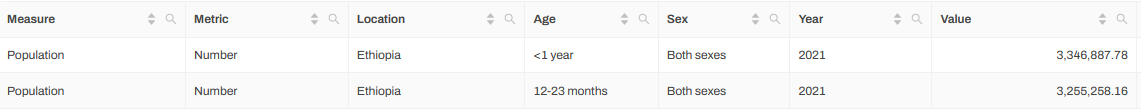

<div class="alert alert-info">

Note

You may notice that we are ignoring the lower and upper bounds also listed
in the table.
GBD does not produce draws for population estimates, so we always use the mean.

</div>

In [91]:
real_population_size = 3_346_887.78 + 3_255_258.16
real_population_size

6602145.9399999995

**Assuming the 2025-2030 average population is unchanged from 2021**,
the ratio of these two numbers is our scaling factor.

In [92]:
scaling_factor = real_population_size / simulated_population_size
scaling_factor

13.20429188

And now we can calculate YLDs, YLLs, and DALYs averted scaled by this factor.

In [93]:
predicted_ylds_averted = simulation_ylds_averted * scaling_factor
predicted_ylds_averted

60.52942702786662

In [94]:
predicted_ylls_averted = simulation_ylls_averted * scaling_factor
predicted_ylls_averted

4708.945302608084

In [95]:
predicted_dalys_averted = predicted_ylds_averted + predicted_ylls_averted
predicted_dalys_averted

4769.47472963595

## Presenting results

We now have estimated an answer to our research question!
Let's communicate it to our "client."
In a realistic scenario, we'd typically create some data visualizations
showing a lot of information -- perhaps broken down by age, by sex,
by location, or exploring multiple sets of scenarios.

Here, we've only recorded a small set of results. We might write:

> According to our simulation, delivering SQ-LNS to all eligible children in
> Ethiopia starting in 2025 would avert **4,800** DALYs by 2030.

## Conclusion

In this tutorial, we've used Vivarium, the Vivarium Public Health suite of components, GBD estimates,
and effect sizes from the literature to come up with an answer to a what-if question.
The simulation model we've built has all the structural pieces that most models we
build on the Simulation Science team have!

However, this tutorial was designed to be as simple as possible.
For a real model:

* Our research question would likely be more complex or have multiple sub-questions.
* Our model would be more complex, including multiple pathways between our intervention
  and our outcome(s).
* Our verification and validation (V&V) process would be much more in-depth.
* We would quantify uncertainty about our result, requiring more
  computational resources (we typically run our analyses on IHME's computing cluster).
* We likely wouldn't "get everything right" the first time, as represented in this tutorial,
  but have a more iterative process.
  We often discover issues with our model design or implementation and need to revisit earlier
  steps.

If you've followed along and are up for a challenge, see if you can apply what you've learned,
and the information you can glean from other documentation, by extending this model!
Here are some ideas you could try:

* Running this simulation for another location (if you have access to build a new artifact)
* Incorporating additional data about the treatment effect size for added realism
* Adding another pathway from our causal diagram to the simulation